In [22]:
import pandas as pd
import math
import csv
import os
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

## Reactions

In [ ]:
# INSTRUCTIONS (Download the Reactome Neo4j graph):
# Download the Reactome database as a Neo4j graph: https://reactome.org/download-data/ is the main page
# These are the possible files: https://reactome.org/download/current/reactome.graphdb.tgz 
# or https://reactome.org/download/current/reactome.graphdb.dump\n",
Neo4j Query:
    MATCH (r1:Reaction)-[edge:precedingEvent]-(r2:Reaction)
    WHERE toLower(r1.speciesName) = 'homo sapiens' and toLower(r2.speciesName) = 'homo sapiens'
    WITH collect(r1) as reactions1, collect(r2) as reactions2, collect(edge) as relation
    CALL apoc.export.csv.data(reactions1 + reactions2, relation, 'human_reactions.csv', {})
    YIELD file, source, format, nodes, relationships, properties, time, rows, batchSize, batches, done, data
    RETURN file, source, format, nodes, relationships, properties, time, rows, batchSize, batches, done, data

In [9]:
nodes = pd.read_csv('input/human_reactions.csv')[['_id', 'stId','displayName', 'name', 'category']].drop_duplicates()
edges = pd.read_excel('input/human_reaction_edges.xlsx').drop_duplicates()

display(nodes.tail())
display(edges.tail())

db2stID = dict(zip(nodes._id, nodes.stId))
db2reactome_id = {int(dbId):reactome_id for dbId,reactome_id in db2stID.items() if not math.isnan(dbId)}


# Edges
edge_list = list()

for i in range(0,len(edges)):
    start = edges['_start'].iloc[i]
    end = edges['_end'].iloc[i]
    rel = edges['_type'].iloc[i]
    
    try:
        start = db2reactome_id[start]
        end = db2reactome_id[end]        
        edge_list.append([start, end])
        
    except:
        continue
        
        

# Output Edges
with open('output/reaction2reaction/edges_reaction_predeces_reaction.csv','w') as fout:
    writer = csv.writer(fout)
    writer.writerow(['Reaction (Reactome)','Reaction (Reactome)','Relationship'])
    relationship = '-head_happens_before_that_tail_reaction->'
    
    for edge in edge_list:
        first_event = edge[1]
        second_event = edge[0]
        writer.writerow(['Reactome_Reaction:'+first_event, 'Reactome_Reaction:'+second_event, relationship])
        
#! cp 'output/reaction2reaction/edges_reaction_predeces_reaction.csv' 'output/edges/edges_reaction_predeces_reaction.csv'
# not needed, ReactionLikeEvent is a superset of it

/home/ubuntu/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,7,8,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,_id,stId,displayName,name,category
17732,2261689.0,R-HSA-917693,ESCRT Disassembly,"[""ESCRT Disassembly""]",transition
17733,2261905.0,R-HSA-917700,MVB Vesicle Formation,"[""MVB Vesicle Formation""]",transition
17735,2261920.0,R-HSA-917696,Cargo Sequestration,"[""Cargo Sequestration""]",transition
17737,2261933.0,R-HSA-917730,Cargo Recognition And Sorting,"[""Cargo Recognition And Sorting""]",transition
35476,NaN,NaN,NaN,NaN,NaN


,_start,_end,_type,order,stoichiometry
8864,1047250,1047220,precedingEvent,0,1
8865,1854602,1853846,precedingEvent,0,1
8866,162822,160567,precedingEvent,1,1
8867,162822,162823,precedingEvent,0,1
8868,881054,878402,precedingEvent,0,1


In [10]:
rxn2rxn = pd.read_csv('output/reaction2reaction/edges_reaction_predeces_reaction.csv')
rxn2rxn.tail()

,Reaction (Reactome),Reaction (Reactome).1,Relationship
8864,Reactome_Reaction:R-HSA-1461995,Reactome_Reaction:R-HSA-1462005,-head_happens_before_that_tail_reaction->
8865,Reactome_Reaction:R-HSA-2395314,Reactome_Reaction:R-HSA-2250301,-head_happens_before_that_tail_reaction->
8866,Reactome_Reaction:R-HSA-177931,Reactome_Reaction:R-HSA-5654641,-head_happens_before_that_tail_reaction->
8867,Reactome_Reaction:R-HSA-5654631,Reactome_Reaction:R-HSA-5654641,-head_happens_before_that_tail_reaction->
8868,Reactome_Reaction:R-HSA-140664,Reactome_Reaction:R-HSA-158419,-head_happens_before_that_tail_reaction->


## Reaction-Like Events

In [ ]:
Neo4j Query:
    MATCH (r1:ReactionLikeEvent)-[edge:precedingEvent]-(r2:ReactionLikeEvent)
    WHERE toLower(r1.speciesName) = 'homo sapiens' and toLower(r2.speciesName) = 'homo sapiens'
    WITH collect(r1) as reactions1, collect(r2) as reactions2, collect(edge) as relation
    CALL apoc.export.csv.data(reactions1 + reactions2, relation, 'human_reaction-like_events.csv', {})
    YIELD file, source, format, nodes, relationships, properties, time, rows, batchSize, batches, done, data
    RETURN file, source, format, nodes, relationships, properties, time, rows, batchSize, batches, done, data

In [23]:
nodes = pd.read_csv('input/human_reaction-like_events.csv')[['_id', 'stId','displayName', 'name', 'category']].drop_duplicates()
edges = pd.read_excel('input/human_reaction-like_event_edges.xlsx').drop_duplicates()

display(nodes.head())
display(edges.head())

db2stID = dict(zip(nodes._id, nodes.stId))
db2reactome_id = {int(dbId):reactome_id for dbId,reactome_id in db2stID.items() if not math.isnan(dbId)}


edge_list = list()

for i in range(0,len(edges)):
    start = edges['_start'].iloc[i]
    end = edges['_end'].iloc[i]
    rel = edges['_type'].iloc[i]
    
    try:
        start = db2reactome_id[start]
        end = db2reactome_id[end]        
        edge_list.append([start, end])
        
    except:
        continue
        
        
file = 'Reaction_(Reactome)_precedes_Reaction_(Reactome).csv'
        
with open(os.path.join('output/reaction2reaction/',file), 'w') as fout:
    writer = csv.writer(fout)
    writer.writerow(['Reaction (Reactome)','Reaction (Reactome)','Relationship'])
    relationship = '-head_happens_before_that_tail_reaction->'
    
    for edge in edge_list:
        first_event = edge[1]
        second_event = edge[0]
        writer.writerow(['Reactome_Reaction:'+first_event, 'Reactome_Reaction:'+second_event, relationship])
        
df = pd.read_csv(os.path.join('output/reaction2reaction/',file))
df.to_csv(os.path.join('output/edges/',file), index=False)
df.to_csv(os.path.join('output/edges_to_use/',file), index=False)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,8,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,_id,stId,displayName,name,category
0,3.0,R-HSA-9626034,EEF1A1 dissociates from p-GFAP,"[""EEF1A1 dissociates from p-GFAP""]",dissociation
4,371.0,R-HSA-9626046,p-GFAP binds EEF1A1,"[""p-GFAP binds EEF1A1""]",binding
6,462.0,R-HSA-9626067,EEF1A1:GTP translocates from lysosomal membran...,"[""EEF1A1:GTP translocates from lysosomal membr...",transition
7,1099.0,R-HSA-9626038,EEF1A1 binds GTP,"[""EEF1A1 binds GTP""]",binding
9,1110.0,R-HSA-9626256,HSPA8:LAMP2a multimers depolymerizes to monomers,"[""HSPA8:LAMP2a multimers depolymerizes to mono...",transition


,_start,_end,_type,order,stoichiometry
0,1965094,1965182,precedingEvent,1,1
1,1965094,283612,precedingEvent,0,1
2,324492,345874,precedingEvent,5,1
3,1909427,593781,precedingEvent,0,1
4,708282,704834,precedingEvent,2,1


In [16]:
rle2rle = pd.read_cs(os.path.join('output/edges/',file))
rle2rle.tail()

,Reaction (Reactome),Reaction (Reactome).1,Relationship
12628,Reactome_Reaction:R-HSA-6807214,Reactome_Reaction:R-HSA-159790,-head_happens_before_that_tail_reaction->
12629,Reactome_Reaction:R-HSA-9007615,Reactome_Reaction:R-HSA-9007625,-head_happens_before_that_tail_reaction->
12630,Reactome_Reaction:R-HSA-2395314,Reactome_Reaction:R-HSA-2250301,-head_happens_before_that_tail_reaction->
12631,Reactome_Reaction:R-HSA-177931,Reactome_Reaction:R-HSA-5654641,-head_happens_before_that_tail_reaction->
12632,Reactome_Reaction:R-HSA-5654631,Reactome_Reaction:R-HSA-5654641,-head_happens_before_that_tail_reaction->


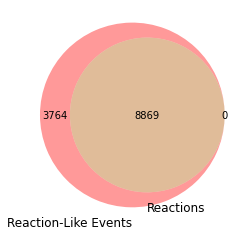

In [31]:
rle2rle_list = list(zip(rle2rle['Reaction (Reactome)'], rle2rle['Reaction (Reactome).1']))
rxn2rxn_list = list(zip(rxn2rxn['Reaction (Reactome)'], rxn2rxn['Reaction (Reactome).1']))
venn2((set(rle2rle_list), set(rxn2rxn_list)), set_labels=['Reaction-Like Events','Reactions'])
plt.show()